In [ ]:
Zomato data analysis project 

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataframe = pd.read_csv("Zomato data .csv")

In [7]:
dataframe


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [9]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


dataframe.head()

What type of resturants have most ratings?

Text(0.5, 0, 'type of resturant')

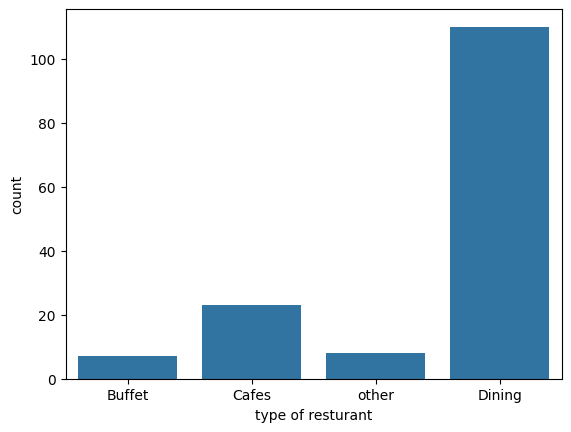

In [13]:
sns.countplot(x = dataframe['listed_in(type)'])
plt.xlabel("type of resturant")

In [ ]:
conclusion - majority of the restaurant is dining category

In [16]:
dataframe.head(90)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
85,The Big O Bakes,No,No,4.0,66,300,Dining
86,Meghana Foods,Yes,No,4.4,4401,600,Dining
87,Krishna Sagar,No,No,3.5,31,200,Dining
88,Dessert Rose,No,No,3.5,7,500,Dining


Text(0, 0.5, 'Votes')

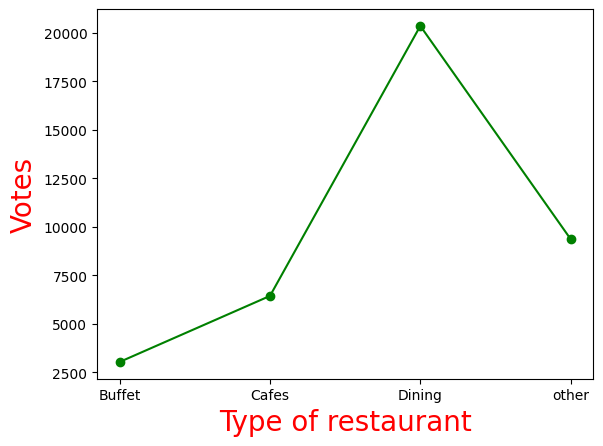

In [19]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})   
plt.plot(result, c = "green",marker = "o")
plt.xlabel("Type of restaurant",c = "red", size = 20)
plt.ylabel("Votes",c = "red" , size =  20 ) 

In [ ]:
COnclusion : Dining restaurat has received maximum votes 

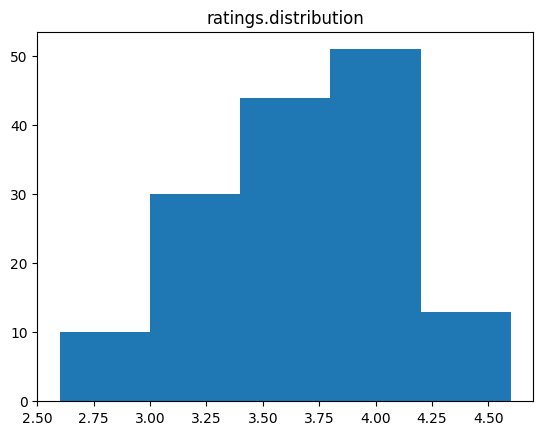

In [21]:
plt.hist(dataframe['rate'],bins = 5)
plt.title("ratings.distribution")
plt.show()

In [ ]:
Conclusion : ths  majority resturant recive 3.75 to 4.25 

In [22]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

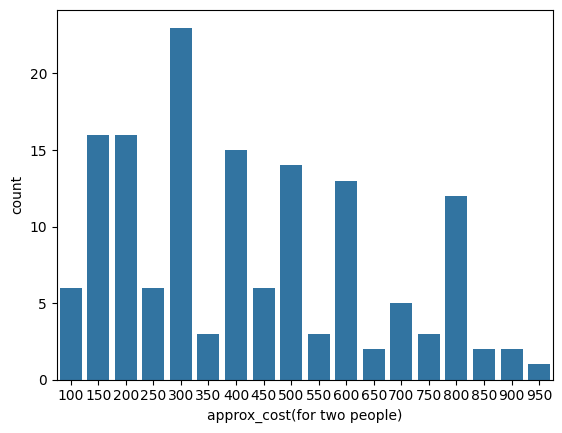

In [23]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x = couple_data)

In [ ]:
Conclusion : 300 found to be the maximum cost for a orders 

<Axes: xlabel='online_order', ylabel='rate'>

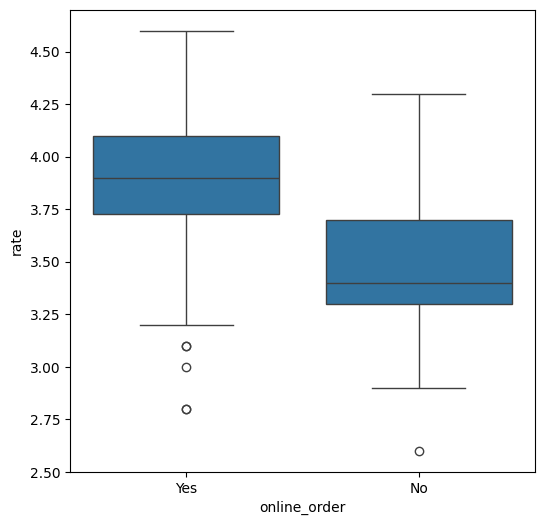

In [30]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order',y = 'rate',data = dataframe)

In [ ]:
Conclusion : Offline orders receive lower ratings 

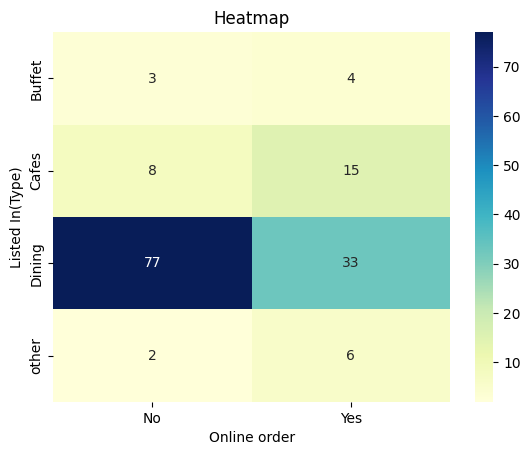

In [34]:
pivot_table = dataframe.pivot_table(index = 'listed_in(type)',columns = 'online_order',aggfunc = 'size',fill_value = 0)
sns.heatmap(pivot_table,annot = True,cmap = "YlGnBu",fmt = 'd')
plt.title("Heatmap")
plt.xlabel("Online order")
plt.ylabel("Listed In(Type)")
plt.show()

In [ ]:
Conclusion : Dining resturants primiraly accept offline orders , whereas cafes receive online orders .This suggests thst clients prefer online ordering at cafes.